In [27]:
import numpy as np  # arrays and matrix math
import pandas as pd  # DataFrames
import matplotlib.pyplot as plt  # for plotting
from mpl_toolkits.mplot3d import Axes3D

In [30]:
df = pd.read_csv("well production.csv")

#Here, the northing and mean easting values of the existing wells are extracted
oilProduction = df[["oil 1", "oil 2", "oil 3", "oil 4", "oil 5", "oil 6", "oil 7", "oil 8", "oil 9", "oil 10", "oil 11", "oil 12"]]
mean_eastings = np.zeros(oilProduction.shape[0])
northings = np.zeros(oilProduction.shape[0])

well_names = list(df["well name"])
for _, row in df.iterrows():
    idx = well_names.index(row["well name"])
    values = pd.read_csv('data/' + row["well name"] + '.csv')
    mean_eastings[idx] = values["easting"].mean()
    northings[idx] = values["northing"][0]
    

#Here, the total production across 12 months for each well is extracted
dfNames = df["well name"]
df = df[["oil 1", "oil 2", "oil 3", "oil 4", "oil 5", "oil 6", "oil 7", "oil 8", "oil 9", "oil 10", "oil 11", "oil 12"]]
listOfTotals = []
listOfTotals.append(df.sum(axis = 1))

Text(0.5, 0, '$Total Oil Production$')

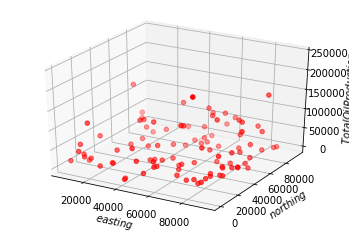

In [37]:
#A 3D plot of the total oil production for existing wells is graphed against northing and easting
x = pd.Series(mean_eastings)
y = pd.Series(northings)
z = listOfTotals

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c = "red")
ax.set_xlabel('$easting$')
ax.set_ylabel('$northing$')
ax.set_zlabel("$Total Oil Production$")


In [ ]:
#The oil production appears to be highest at high northing and low easting values.